In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import transforms, utils
from model import model_ResNet18_C
from runner import load_cifar10

# Download the pre-trained model
model = model_ResNet18_C()
model.load_state_dict(torch.load('/home/user79/PJ/CIFAR-10/Model_ResNet18_9/best_model.pth'))
model.eval()

train_data, train_labels, test_data, test_labels = load_cifar10("./data/cifar-10-batches-py")  

In [2]:
# Visualize the input image
def visualize_input_image(image):
    # Convert the image from Tensor to numpy array and adjust dimensions
    img = image.permute(1, 2, 0).numpy()
    # Normalize to [0,1] range
    img = (img - img.min()) / (img.max() - img.min())
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title('Input Image')
    plt.axis('off')
    plt.show()

# Visualize the first convolutional layer weights
def visualize_first_conv_weights(model):
    # Get the weights of the first convolutional layer
    first_conv = model.conv1
    weights = first_conv.weight.data.cpu()
    
    # Create a grid
    nrows = 8
    ncols = 8
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    
    for i in range(nrows):
        for j in range(ncols):
            if i * ncols + j < weights.size(0):
                # Get the weights of a single kernel
                kernel = weights[i * ncols + j].permute(1, 2, 0).numpy()
                # Normalize to [0,1] range
                kernel = (kernel - kernel.min()) / (kernel.max() - kernel.min())
                axes[i, j].imshow(kernel)
                axes[i, j].axis('off')
    
    plt.suptitle('First Convolution Layer Weights', fontsize=16, y=0.95)  # Adjusted title position
    plt.show()

# Visualize feature maps
def visualize_feature_maps(model, image):
    # List to store feature maps
    feature_maps = []
    
    # Define hook function
    def hook(module, input, output):
        feature_maps.append(output.detach().cpu())
    
    # Register hooks for each convolutional layer
    hooks = []
    for name, module in model.named_modules():
        if isinstance(module, nn.Conv2d):
            hooks.append(module.register_forward_hook(hook))
    
    # Forward pass
    with torch.no_grad():
        model(image.unsqueeze(0))
    
    # Release hooks
    for hook in hooks:
        hook.remove()
    
    # Visualize the feature maps of the first convolutional layer
    if len(feature_maps) > 0:
        first_feature_map = feature_maps[0][0]  # Get the feature map of the first image
        
        # Create a grid
        nrows = 8
        ncols = 8
        fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
        fig.subplots_adjust(hspace=0.1, wspace=0.1)
        
        for i in range(nrows):
            for j in range(ncols):
                if i * ncols + j < first_feature_map.size(0):
                    feature = first_feature_map[i * ncols + j]
                    axes[i, j].imshow(feature, cmap='viridis')
                    axes[i, j].axis('off')
        
        plt.suptitle('First Convolution Layer Feature Maps', fontsize=16, y=0.95)  # Adjusted title position
        plt.show()


def visualize_all(model, test_data):
    # Visualize the first input image
    visualize_input_image(test_data[0])

    # Visualize feature maps
    visualize_feature_maps(model, test_data[0])
    
    # Visualize first convolutional layer weights
    visualize_first_conv_weights(model)

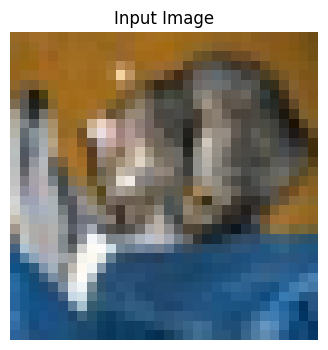

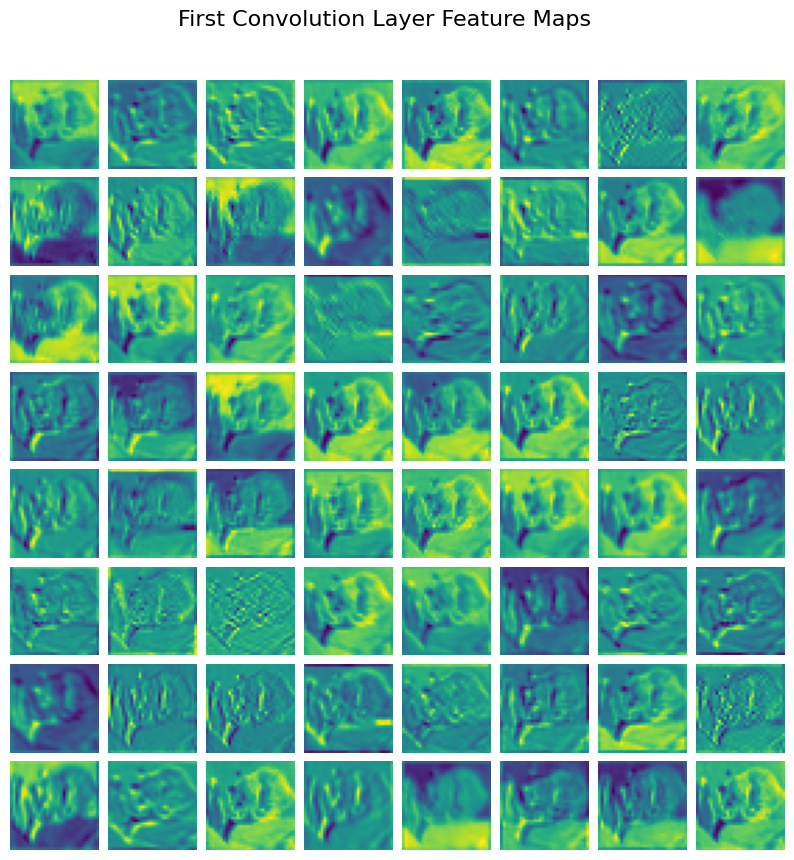

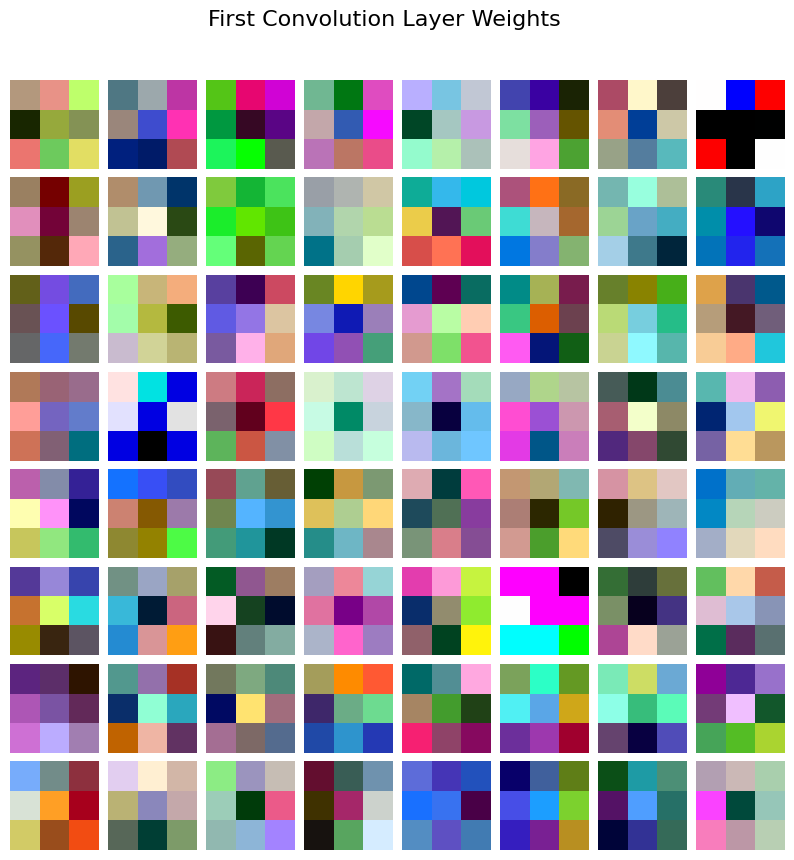

In [3]:
visualize_all(model, test_data)